# Assignment 1 Solutions

# Question 1:  

A cat is launched from the top of the Trible library with zero initial velocity, and lands, unharmed, on the ground below time later. The height of the Trible library is measured to be (21.2 +/- 0.4) m. The time is measured to be (2.04 +/- 0.05) s.

(a) What is the measured value of the acceleration due to gravity, ignoring air resistance?

(b) Assuming that the uncertainties quoted above follow a uniform error distribution, what is the measured uncertainty in the acceleration due to gravity?

(c) Assuming that the uncertainties quoted above follow a Gaussian error distribution, what is the measured uncertainty in the acceleration due to gravity?

In [91]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats

from sympy import *

g, h, t, dg, dh, dt = symbols("g, h, t, dg, dh, dt")
g = 2*h/t**2

g

2*h/t**2

In [92]:
dgdh = abs(diff(g,h))

dgdh

2*Abs(t**(-2))

In [93]:
dgdt = abs(diff(g,t))

dgdt

4*Abs(h/t**3)

In [94]:
# Calculate the value of the function
gn = N(g.subs({h:21.2, t:2.04}))
print ('g = %0.2f ' % gn)

g = 10.19 


In [95]:
# Calculate the uncertainty in g, assuming uniform uncertainties.
dg = dgdh*dh + dgdt*dt

dg

2*dh*Abs(t**(-2)) + 4*dt*Abs(h/t**3)

In [96]:
# Evaluate numerically
dgn = N(dg.subs({h:21.2, t:2.04, dh:0.4, dt:0.05}))

print ("g = %0.2f +/- %.2f" % (gn,dgn))

g = 10.19 +/- 0.69


In [97]:
# calculate the uncertainty in g, assuming gaussian uncertainties.
dgn = sqrt( dgdh**2*dh**2 + dgdt**2*dt**2 )

dg

2*dh*Abs(t**(-2)) + 4*dt*Abs(h/t**3)

In [98]:
# Evaluate numerically
dgn = N(dg.subs({h:21.2, t:2.04, dh:0.4, dt:0.05}))

print ("g = %0.2f +/- %.2f" % (gn,dgn))



g = 10.19 +/- 0.69


In [100]:
h = 21.2
dh = 0.4
t = 2.04
dt = 0.05

dgdh = abs(2/t**2)
dgdt = abs(-4*h/t**3)

gn = 2.0*h/t**2

dgb = dgdh*dh + dgdt*dt

dgc = sqrt(dgdh**2*dh**2+dgdt**2*dt**2)

print('a: ',gn,'    b: ',dgb,'     c: ',dgc)

a:  10.188389081122645     b:  0.6916645935575305      c:  0.535149491541534


# Question 2: 

Airlines sometimes overbook flights. Suppose that for a plane with 50 seats, 55 passengers have tickets. Define the random variable Y as the number of ticketed passengers who actually show up for the flight. The probability mass function of Y appears in the accompanying table.

(a) What is the probability that the flight will accommodate all ticketed passengers who show up?

(b) What is the probability that not all ticketed passengers who show up can be accommodated?

(c) If you are the first person on the standby list (which means you will be the first one to get on the plane if there are any seats available after all ticketed passengers have been accommodated), what is the probability that you will be able to take the flight? 

What is this probability if you are the third person on the standby list?

In [9]:
y = np.array([45,46,47,48,49,50,51,52,53,54,55])
py = np.array([0.06,0.11,0.12,0.12,0.24,0.18,0.06,0.05,0.03,0.02,0.01])

nseats = 50
ntickets = 55

sum = 0.0
for i in range(len(y)):
    if (y[i]<=nseats):
        sum = sum + py[i]
        
print (sum)

# or, with list comprehension

good = np.sum(py[y<=nseats])

print (good)

0.8299999999999998
0.8299999999999998


In [10]:
print (1-sum)

0.17000000000000015


In [11]:
sum = 0.0
for i in range(len(y)):
    if (y[i]<=nseats-1):
        sum = sum + py[i]
        
print (sum)

good = np.sum(py[y<=nseats-1])

print (good)

0.6499999999999999
0.6499999999999999


In [12]:
sum = 0.0
for i in range(len(y)):
    if (y[i]<=nseats-3):
        sum = sum + py[i]
        
print (sum)

good = np.sum(py[y<=nseats-3])

print (good)

0.29
0.29


# Question 3: 

A mail-order company business has six telephone lines. Let X denote the number of lines in use at a specified time. Suppose the pmf of X is as given in the accompanying table.


Calculate the probability of each of the following events.

(a) {at most three lines are in use}

(b) {fewer than three lines are in use}

(c) {at least three lines are in use}

(d) {between two and five lines, inclusive, are in use}

(e) {between two and four lines, inclusive, are not in use}

(f) {at least four lines are not in use}

In [13]:
x = np.array([0,1,2,3,4,5,6])
xnot = np.array([6,5,4,3,2,1,0])
px = np.array([0.15,0.10,0.25,0.20,0.20,0.04,0.06])

In [14]:
suma = 0.0
sumb = 0.0
sumc = 0.0
sumd = 0.0
sume = 0.0
sumf = 0.0
for i in range(len(x)):
    if (x[i] <= 3):
        suma = suma + px[i]
    if (x[i] < 3):
        sumb = sumb + px[i]
    if (x[i] >= 3):
        sumc = sumc + px[i]
    if (x[i] >= 2 and x[i] <=5):
        sumd = sumd + px[i]
    if (xnot[i] >=2 and xnot[i] <=4):
        sume = sume + px[i]
    if (xnot[i] >=4):
        sumf = sumf + px[i]
        
print (suma,sumb,sumc,sumd,sume,sumf)

0.7 0.5 0.5 0.6900000000000001 0.65 0.5


# Question 4: 

Compute the following binomial probabilities directly from the formula for b(x; n, p).

(a) b(3; 5, 0.48)

(b) b(2; 7, 0.77)

(c) P(3 <= X <= 5) when n = 9 and p = 0.76

(d) P(1 <= X) when n = 12 and p = 0.14

In [15]:
from scipy.stats import binom

In [16]:
X = binom(5,0.48)

print (X.pmf(3))

0.2990407679999999


In [17]:
X = binom(7,0.77)

print (X.pmf(2))

0.008013826305870005


In [18]:
X = binom(9,0.76)

print (X.cdf(5) - X.cdf(2))

0.1465132213170339


In [19]:
X = binom(12,0.14)

print (1 - X.cdf(0))

0.8363253522544125


# Question 5:

When circuit boards used in the manufacture of compact disc players are tested, the long-run percentage of defectives is 10%. Let X = the number of defective boards in a random sample of size n = 25, so X ~ Bin(25, 0.10).

(a) Determine P(X <= 2).

(b) Determine P(X >= 5).

(c) Determine P(1 <= X <= 4).

(d) What is the probability that none of the 25 boards is defective?

(e) Calculate the expected value and standard deviation of X.

In [20]:
n = 25
p = 0.10

X = binom(n,p)

In [21]:
print (X.cdf(2))

0.5370940500509418


In [22]:
print (1-X.cdf(4))

0.09799362119546473


In [23]:
print (1-X.cdf(4))

0.09799362119546473


In [24]:
print (X.cdf(0))

0.0717897987691853


In [25]:
print (X.mean(),X.std())

2.5 1.5


In [26]:
print (n*p,np.sqrt(n*p*(1-p)))

2.5 1.5


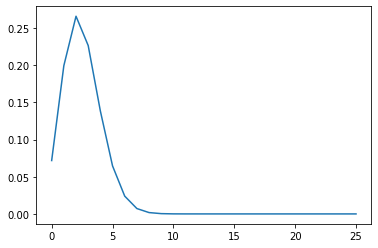

In [27]:
x = [k for k in range(0,26)]
y = [X.pmf(k) for k in range(0,26)]
import matplotlib.pyplot as plt
plt.plot(x,y)

# Question 6:

An airport limousine can accommodate up to four passengers on any one trip. The company will accept a maximum of six reservations for a trip, and a passenger must have a reservation. From previous records, 40% of all those making reservations do not appear for the trip. Answer the following questions, assuming independence wherever appropriate.

(a) If six reservations are made, what is the probability that at least one individual with a reservation cannot be accommodated on the trip?

(b) If six reservations are made, what is the expected number of available places when the limousine departs?

(c) Suppose the probability distribution of the number of reservations made is given in the accompanying table.

Number of reservations    	3      4	 5	   6

Probability	                0.09   0.24  0.33  0.34    

Let X denote the number of passengers on a randomly selected trip. Obtain the probability mass function of X.

In [46]:
p = 0.60 #probability that a reservation shows up

# Part A
N = 6
X = binom(N,p)

print (X.pmf(5) + X.pmf(6)) # we have a problem if either 5 or 6 people show up!

0.23328000000000004


In [47]:
# Create an array corresponding to the number of people that could possibly show up
npass = np.array([0,1,2,3,4,5,6])

# create an array that corresponds to the number of spaces available, for a given
# number of people showing up.
nspaces = np.array([4,3,2,1,0,0,0])

sum = 0.0
# Loop through all situations (0 to 6 people showing up)
for i in range(len(nspaces)):
    sum = sum + X.pmf(i)*nspaces[i]
    print (" No. of people showing up = %0.0f    Probabilty = %0.4f    No. of spaces = %0.0f " % (i,X.pmf(i),nspaces[i]))

print()
print ("Expectation value = %0.4f" % sum)

 No. of people showing up = 0    Probabilty = 0.0041    No. of spaces = 4 
 No. of people showing up = 1    Probabilty = 0.0369    No. of spaces = 3 
 No. of people showing up = 2    Probabilty = 0.1382    No. of spaces = 2 
 No. of people showing up = 3    Probabilty = 0.2765    No. of spaces = 1 
 No. of people showing up = 4    Probabilty = 0.3110    No. of spaces = 0 
 No. of people showing up = 5    Probabilty = 0.1866    No. of spaces = 0 
 No. of people showing up = 6    Probabilty = 0.0467    No. of spaces = 0 

Expectation value = 0.6799


In [48]:
# create an array corresponding to the probabilities of there being 0 through 6 reservations
pres = np.array([0.00,0.00,0.00,0.11,0.22,0.28,0.39])

pmf = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])

print ("N_showup   N_reservations   P(N_showup)  P(N_reservations)   P(both)")
for i in range(len(npass)):
    print()
    for j in range(len(pres)):
        X = binom(j,p)
        pmf[i] = pmf[i] + X.pmf(i)*pres[j]
        
        if (X.pmf(i) != 0 and pres[j] != 0):
            print (i,"        ",j,("                %0.4f" %X.pmf(i)),"    ",pres[j],("                %0.4f" % (X.pmf(i)*pres[j])))
        
print()
print (pmf)

N_showup   N_reservations   P(N_showup)  P(N_reservations)   P(both)

0          3                 0.0640      0.11                 0.0070
0          4                 0.0256      0.22                 0.0056
0          5                 0.0102      0.28                 0.0029
0          6                 0.0041      0.39                 0.0016

1          3                 0.2880      0.11                 0.0317
1          4                 0.1536      0.22                 0.0338
1          5                 0.0768      0.28                 0.0215
1          6                 0.0369      0.39                 0.0144

2          3                 0.4320      0.11                 0.0475
2          4                 0.3456      0.22                 0.0760
2          5                 0.2304      0.28                 0.0645
2          6                 0.1382      0.39                 0.0539

3          3                 0.2160      0.11                 0.0238
3          4                 0

In [49]:
print (pmf[0])
print (pmf[1])
print (pmf[2])
print (pmf[3])
print (pmf[4]+pmf[5]+pmf[6])

0.017136640000000005
0.10135296000000005
0.24197760000000001
0.3043872000000001
0.3351456


# Question 7:

Let X, the number of flaws on the surface of a randomly selected boiler of a certain type, have a Poisson distribution with parameter λ = 3. Compute the following probabilities.

(a) P(X ≤ 8)

(b) P(X = 8)

(c) P(9 ≤ X)

(d) P(5 ≤ X ≤ 8)

(e) P(5 < X < 8)

In [ ]:
X = stats.poisson(3)

In [ ]:
print (X.cdf(8))
print (X.pmf(8))
print (1-X.cdf(8))
print (X.cdf(8)-X.cdf(4))
print (X.pmf(6)+X.pmf(7))

# Question 8

Consider writing onto a computer disk and then sending it through a certifier that counts the number of missing pulses. Suppose this number X has a Poisson distribution with parameter λ = 0.19.

(a) What is the probability that a disk has exactly one missing pulse?

(b) What is the probability that a disk has at least two missing pulses?

(c) If two disks are independently selected, what is the probability that neither contains a missing pulse?

In [ ]:
X = stats.poisson(0.19)

In [ ]:
# part A

print (X.pmf(1))

# part B

print (1-X.cdf(1))

# part C

print (X.pmf(0)*X.pmf(0))

# Question 9

In proof testing of circuit boards, the probability that any particular diode will fail is 0.01. Suppose a circuit board contains 150 diodes.

(a) How many diodes would you expect to fail?

What is the standard deviation of the number that are expected to fail?

(b) What is the (approximate) probability that at least four diodes will fail on a randomly selected board? (Use binomial approximation.)

(c) If five boards are shipped to a particular customer, how likely is it that at least four of them will work properly? (A board works properly only if all its diodes work.)

(-2.0, 8.0)

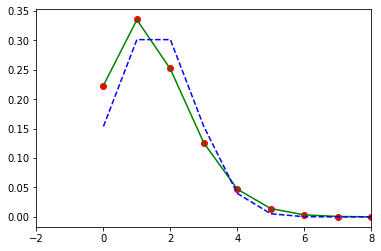

In [36]:
N = 150
p = 0.01

lmbda = N*p

Xb = stats.binom(N,p)
Xp = stats.poisson(lmbda)
Xg = stats.norm(N*p,np.sqrt(N*p*(1-p)))

kmax = 8

x = [k for k in range(0,kmax+1)]
yb = [Xb.pmf(k) for k in range(0,kmax+1)]
yp = [Xp.pmf(k) for k in range(0,kmax+1)]
yg = [Xg.pdf(k) for k in range(0,kmax+1)]

import matplotlib.pyplot as plt
plt.plot(x,yb,'ro')
plt.plot(x,yp,'g-')
plt.plot(x,yg,'b--')
plt.xlim(-2,kmax)

In [ ]:
# part A

print (N*p,Xb.mean())
print (np.sqrt(N*p*(1-p)), Xb.std())

print (Xp.mean(),Xp.std())
print (Xg.mean(),Xg.std())

In [ ]:
# part B

# Exact answer - binomial
print (1 - Xb.cdf(3))

# Approximate answer - Poisson
print (1 - Xp.cdf(3))

# It appears that WebAssign is using the Poisson distribution (which admittedly is an approximation, but
# the wording of the question is misleading.

In [ ]:
# Binomial for the 150 diode board, binomial for the five boards shipped. 
p_all_work = Xb.pmf(0)

Xfive = binom(5,p_all_work)

print (1-Xfive.cdf(3))

# Poisson for the 150 diode board, binomial for the five boards shipped. <--- This is what WebAssign wants!!!
p_all_work = Xp.pmf(0)

Xfive = binom(5,p_all_work)

print (1-Xfive.cdf(3))